In [5]:
# Import packages

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [6]:
# Read in data

data = pd.read_csv("Procrustes_all.csv")

In [20]:
# Subset data for each species

riparia = data[ data['species']=="Vitis_riparia" ]
labrusca = data[ data['species']=="Vitis_labrusca" ]
rupestris = data[ data['species']=="Vitis_rupestris" ]
cinerea = data[ data['species']=="Vitis_cinerea" ]
acerifolia = data[ data['species']=="Vitis_acerifolia" ]
amurensis = data[ data['species']=="Vitis_amurensis" ]
vulpina = data[ data['species']=="Vitis_vulpina" ]
aestivalis = data[ data['species']=="Vitis_aestivalis" ]
palmata = data[ data['species']=="Vitis_palmata" ]
coignetiae = data[ data['species']=="Vitis_coignetiae" ]
ampelopsis = data[ data['species']=="Ampelopsis_brevipedunculata" ]

In [21]:
# The function "format_array" creates a properly formatted array from dataframe
# The function "model_landmarks" takes a dataframe, polynomial order,
# xvals, and returns modeled values for xvals across a shoot

def format_array(dataframe):
    
    df = dataframe
    df_vals = df.drop(columns=['vine','year','vine_year','species','from_tip','count','bin',
                               'PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9',
                               'PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17',
                               'PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25',
                               'PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33',
                               'PC34','PC35','PC36','PC37','PC38','PC39','PC40','PC41',
                               'PC42'])
    
    df_array = df_vals.values
    return df_array

def model_landmarks(dataframe, poly_order, xvals):
    
    array = format_array(dataframe)
        
    matrix = np.zeros((42, xvals))

    for i in range(42):

        N = np.polyfit( array[:,0], array[:,i+1], poly_order )
        func = np.poly1d(N)
        model_values = func( np.linspace(min(array[:,0]), max(array[:,0]), xvals) )
        matrix[i,:] = model_values

    Tresults = matrix.T
    
    df = pd.DataFrame(data=Tresults, columns=['x1', 'y1', #0, 1
                                              'x2', 'y2', #2, 3
                                              'x3', 'y3', #4, 5
                                              'x4', 'y4', #6, 7
                                              'x5', 'y5', #8, 9
                                              'x6', 'y6', #10, 11
                                              'x7', 'y7', #12, 13
                                              'x8', 'y8', #14, 15
                                              'x9', 'y9', #16, 17
                                              'x10', 'y10', #18, 19
                                              'x11', 'y11', #20, 21
                                              'x12', 'y12', #22, 23
                                              'x13', 'y13', #24, 25
                                              'x14', 'y14', #26, 27
                                              'x15', 'y15', #28, 29
                                              'x16', 'y16', #30, 31
                                              'x17', 'y17', #32, 33
                                              'x18', 'y18', #34, 35
                                              'x19', 'y19', #36, 37
                                              'x20', 'y20', #38, 39
                                              'x21', 'y21'  #40, 41
                                         ])
    
    veins_x = df.iloc[:, [0]+[10]+[26]+[8]+[28]+[12]+[2]+[16]+[32]+[14]+[34]+[18]+[4]+[22]+[38]+[20]+[40]+[24]+[6]+[4]+[2]+[0] ]
    veins_y = df.iloc[:, [1]+[11]+[27]+[9]+[29]+[13]+[3]+[17]+[33]+[15]+[35]+[19]+[5]+[23]+[39]+[21]+[41]+[25]+[7]+[5]+[3]+[1] ]

    blade_x = df.iloc[:, [26]+[28]+[30]+[32]+[34]+[36]+[38]+[40] ]
    blade_y = df.iloc[:, [27]+[29]+[31]+[33]+[35]+[37]+[39]+[41] ]
    
    return veins_x, veins_y, blade_x, blade_y


/Users/chitwood/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


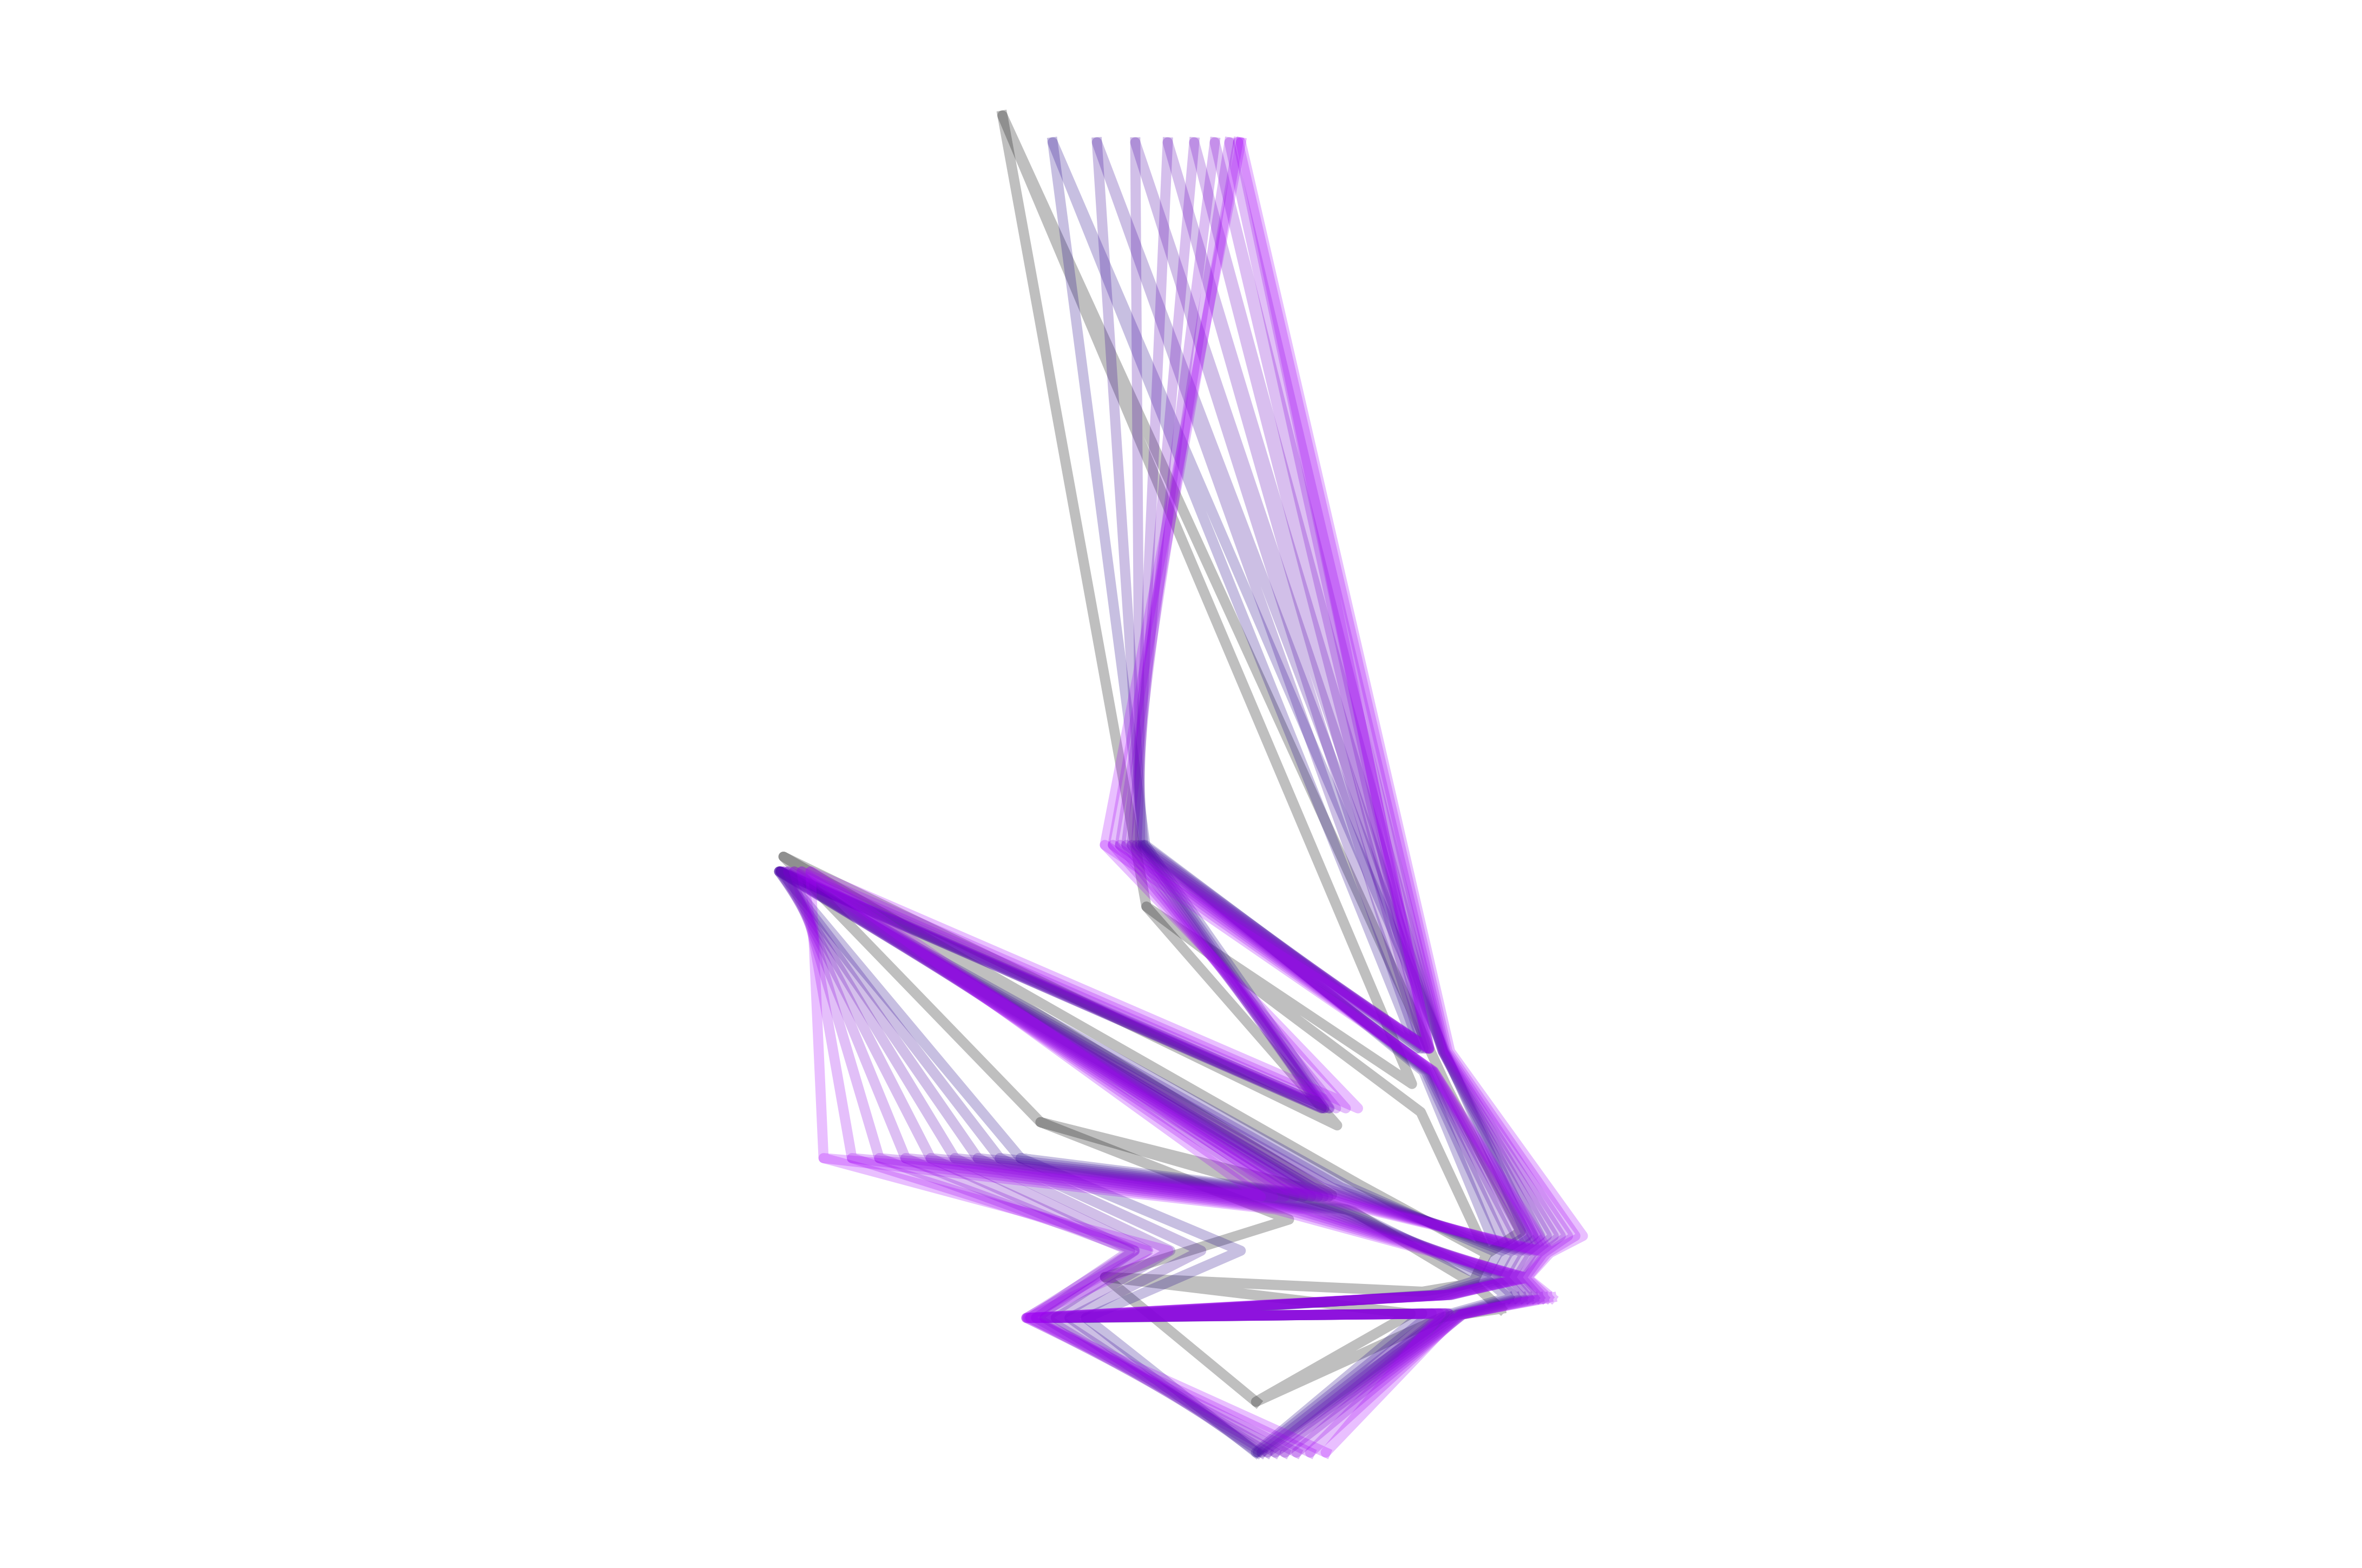

In [23]:
# Plot out superimposed leaves for 10 equally spaced positions across the shoot 
# for each species

species_df = ampelopsis
frames = 10
a = 0.25

species_df_vx, species_df_vy, species_df_bx, species_df_by = model_landmarks(
    dataframe=species_df, poly_order=2, xvals=frames)

plt.plot(species_df_vx.T.iloc[:,0], -species_df_vy.T.iloc[:,0], alpha=a, c='#000000')
plt.plot(species_df_bx.T.iloc[:,0], -species_df_by.T.iloc[:,0], alpha=a, c='#000000')

plt.plot(species_df_vx.T.iloc[:,1], -species_df_vy.T.iloc[:,1], alpha=a, c='#200089')
plt.plot(species_df_bx.T.iloc[:,1], -species_df_by.T.iloc[:,1], alpha=a, c='#200089')

plt.plot(species_df_vx.T.iloc[:,2], -species_df_vy.T.iloc[:,1], alpha=a, c='#360097')
plt.plot(species_df_bx.T.iloc[:,2], -species_df_by.T.iloc[:,1], alpha=a, c='#360097')

plt.plot(species_df_vx.T.iloc[:,3], -species_df_vy.T.iloc[:,1], alpha=a, c='#4800a5')
plt.plot(species_df_bx.T.iloc[:,3], -species_df_by.T.iloc[:,1], alpha=a, c='#4800a5')

plt.plot(species_df_vx.T.iloc[:,4], -species_df_vy.T.iloc[:,1], alpha=a, c='#5a00b4')
plt.plot(species_df_bx.T.iloc[:,4], -species_df_by.T.iloc[:,1], alpha=a, c='#5a00b4')

plt.plot(species_df_vx.T.iloc[:,5], -species_df_vy.T.iloc[:,1], alpha=a, c='#6b00c2')
plt.plot(species_df_bx.T.iloc[:,5], -species_df_by.T.iloc[:,1], alpha=a, c='#6b00c2')

plt.plot(species_df_vx.T.iloc[:,6], -species_df_vy.T.iloc[:,1], alpha=a, c='#7b00d1')
plt.plot(species_df_bx.T.iloc[:,6], -species_df_by.T.iloc[:,1], alpha=a, c='#7b00d1')

plt.plot(species_df_vx.T.iloc[:,7], -species_df_vy.T.iloc[:,1], alpha=a, c='#8b00e0')
plt.plot(species_df_bx.T.iloc[:,7], -species_df_by.T.iloc[:,1], alpha=a, c='#8b00e0')

plt.plot(species_df_vx.T.iloc[:,8], -species_df_vy.T.iloc[:,1], alpha=a, c='#9b00f0')
plt.plot(species_df_bx.T.iloc[:,8], -species_df_by.T.iloc[:,1], alpha=a, c='#9b00f0')

plt.plot(species_df_vx.T.iloc[:,9], -species_df_vy.T.iloc[:,1], alpha=a, c='#ab00ff')
plt.plot(species_df_bx.T.iloc[:,9], -species_df_by.T.iloc[:,1], alpha=a, c='#ab00ff')


plt.axes().set_aspect('equal', 'datalim')
plt.axis('off')

plt.rcParams['figure.dpi'] = 900